<h2 style="font-size:40px;text-align:center;">Analiza nutritivnih vrijednosti hrane Iz DM-a, McDonaldsa, KFC-a i Burger Kinga</h2>

<h2 style = "font-size:20px;">Tema projektnog zadatka za Projekt R vezana je za prikupljanje podataka, uređivanje istih i analizu dobivene .csv datoteke. 
Temeljni problem bio je pronaći potrebne podatke iz vjerodostojnih izvora.
Za trgovinu DM zadatak je bio jednostavan zbog pristupačnosti željenih podataka na njihovoj web stranici.
Restorani brze hrane - McDonalds, KFC i Bruger King otežali su posao zbog nekonzistentnosti u artiklima i nutritivnom vrijednostima.
Podatci su izvađeni iz MyFitnessPal aplikacije.
MyFitnessPal je svjetski poznata aplikacija koja nudi mogućnost skeniranja bar koda artikla te time dohvaća relevantne podatke nutritivnih vrijednosti vezane za taj artikl. Njihova baza podataka je opširna i pouzdana zbog čega je savršena za ovaj projekt. 

<h2 style = "font-size:20px;">Podatci su prikupljani u excel datoteku te su nakon uređivanja i organiziranja exportani u .csv oblik radi daljnje jednostavnosti analize.

<h2 style = "font-size:20px;">Za početak je potrebno učitati potrebne biblioteke.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style = "font-size:20px;">Sada ćemo učitati skup podataka u radno okruženje i dati mu ime "data".
Također prije analize je dobra praksa upoznati se sa skupom podataka kroz nekoliko funkcija.

In [20]:
data = pd.read_csv("PROJEKT_R_DATA_CSV.csv")

# Funkcija head() pokazuje prvih 5 redaka 
data.head()

,IME TRGOVINE,IME PROIZVODA,MASA (g),CIJENA (€),ENERGETSKA VRIJEDNOST / 100g (kcal),MASTI (g),ZASIĆENE MASNE KISELINE(g),TRANS MASTI (g),UGLJIKOHIDRATI (g),ŠEĆER (g),VLAKNA (g),BJELANČEVINE (g),SOL (g)
0,DM,Kimchi,270,4.63,41.0,0.5,0.1,0.0,8.7,1.4,3.2,1.4,2.00
1,DM,Varivo od graška,400,2.24,59.0,0.9,0.1,0.0,7.9,1.5,2.9,3.3,0.98
2,DM,Varivo od leće,400,2.24,64.0,1.0,0.1,0.0,8.6,1.6,3.4,3.3,1.10
3,DM,Varivo od slanutka,400,2.24,91.0,3.1,2.4,0.0,11.0,2.5,2.6,3.0,1.20
4,DM,Sušene rajčice organic,180,3.97,224.0,18.0,2.7,0.0,11.0,9.2,3.0,5.9,3.70


<h2 style = "font-size:20px;">Kada smo se upoznali s načinom formatiranja podataka možemo započeti s istraživačkim pitanjima.
Odabrana pitanja:

   - Postoji li značajna povezanost između vrste hrane (npr. "zdrava" hrana ili fast-food) i kategorije (npr. "niska količina masti" ili "visoka količina masti")?
   - Postoji li značajna povezanost između vrste hrane i kategorije šećera (npr. "niska količina šećera" ili "visoka količina šećera")?
   - Je li prosječna energetska vrijednost u DM-u statistički značajno različita od prosječne energetske vrijednosti u fast-food restoranima?
   - Postoji li linearna veza između količine masti i energetske vrijednosti u hrani?
   - Postoji li statistički značajna razlika u udjelu trans masti između različitih vrsta fast-food restorana (npr. McDonald's, KFC, Burger King)?
   - Može li se na temelju nutritivnih vrijednosti proizvoda iz različitih restorana modelirati sustav koji pogađa iz kojeg restorana proizvod dolazi?

<h2 style = "font-size:34px;">PITANJE 1: Postoji li značajna povezanost između vrste hrane (npr. "zdrava" hrana ili fast-food) i kategorije (npr. "niska količina masti" ili "visoka količina masti")?</h2>

<h2 style = "font-size:20px;">Odabiremo Chi-kvadrat test kako bi dobili količinu različitosti varijanci količine masti u zadanim kategorijama.

<h2 style = "font-size:20px;">Nulta hipoteza (H0): Vrsta trgovine i količina masti su nezavisne.

Alternativna hipoteza (H1): Vrsta trgovine i količina masti su zavisne

In [21]:
from scipy.stats import chi2_contingency

# Grupiranje McDonalds-a, KFC-a i Burger King-a pod naziv "Fast Food"
data['Vrsta Trgovine'] = np.where(data['IME TRGOVINE'].isin(['McDonald\'s', 'KFC', 'Burger King']), 'Fast Food', 'DM')

# Tablica kontigencije
contingency_table = pd.crosstab(data['Vrsta Trgovine'], data['MASTI (g)'])

# Chi-kvadrat test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-kvadrat:", chi2)
print("P-vrijednost:", p)

Chi-kvadrat: 36.44444444444445
P-vrijednost: 0.13162606833944565


<h2 style = "font-size:20px;">Dobiveni rezultati pokazuju kako ne možemo odbaciti nultu hipotezu u korist alternativne jer P-vrijednost nije manja od 0.05 (po dogovoru). 

No pokrenut ćemo drugi test - Fisherov egzaktni test. Ne možemo se osloniti na Chi-kvadrat test kod manjih skupova podataka, zato koristimo Fisherov egzaktni test.

In [22]:
from scipy.stats import fisher_exact

# Stvaranje binarne varijable "Niska mast" i "Visoka mast"
data['Kategorija masti'] = data['MASTI (g)'].apply(lambda x: 'visoka' if x >= 10 else 'niska')

# Kontingencijska tablica
contingency_table = pd.crosstab(data['Vrsta Trgovine'], data['Kategorija masti'])

# Izračun Fisherovog egzaktnog testa
odds_ratio, p_value = fisher_exact(contingency_table)

print("Omjer Šansi:", odds_ratio)
print("P-vrijednost:", p_value)

Omjer Šansi: 16.0
P-vrijednost: 0.0012139623894342761


<h2 style = "font-size:20px;">Kako je P-vrijednost ovaj put manja od 0.05 možemo odbaciti H0 u korist H1.

Rezultati pokazuju kako postoji značajna povezanost između vrste hrane (Fast Food / DM) i kategorije masti (visoka / niska). Omjer Šansi = 16 pokazuje da je šansa za visoku razinu masti u Fast Food hrani 16 puta veća nego kod hrane iz DM-a.

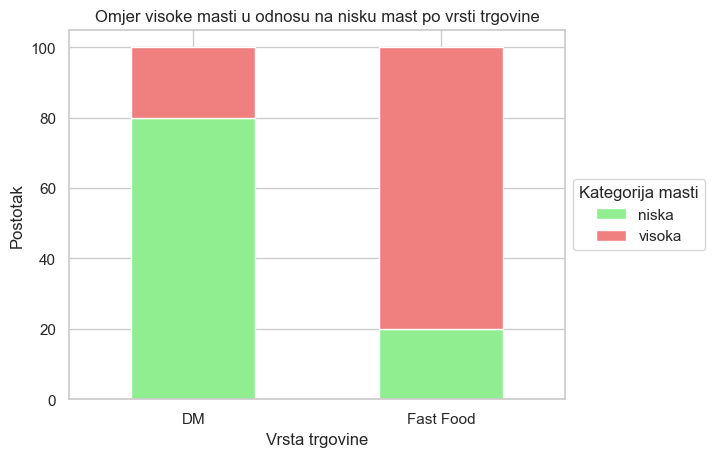

In [23]:
# Stvaranje postotnog vertikalnog trakastog grafikona
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
ax = percentage_table.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])
plt.title('Omjer visoke masti u odnosu na nisku mast po vrsti trgovine')
plt.xlabel('Vrsta trgovine')
plt.ylabel('Postotak')
plt.legend(title='Kategorija masti', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Rotacija oznaka na x-osi 
plt.xticks(rotation=0)

plt.show()

<h2 style = "font-size:34px;">PITANJE 2: Postoji li značajna povezanost između vrste hrane i kategorije šećera (npr. "niska količina šećera" ili "visoka količina šećera")?</h2>

<h2 style = "font-size:20px;">Ovo istraživačko pitanje je po procesu slično prošlome pa nije potrebno objašnjavati proces dobivanja podataka.

In [24]:
data['Kategorija šećera'] = data['ŠEĆER (g)'].apply(lambda x: 'visoki' if x >= 3 else 'niski')

# Kontingencijska tablica za kategoriju šećera
contingency_table_sugar = pd.crosstab(data['Vrsta Trgovine'], data['Kategorija šećera'])

# Izračun Fisherovog egzaktnog testa za kategoriju šećera
odds_ratio_sugar, p_value_sugar = fisher_exact(contingency_table_sugar)

print("Omjer Šansi za šećer:", odds_ratio_sugar)
print("P-vrijednost za šećer:", p_value_sugar)

Omjer Šansi za šećer: 3.2857142857142856
P-vrijednost za šećer: 0.1329160604727368


<h2 style = "font-size:20px;">Pretragom interneta saznajemo da je preporučena doza šećera po 100g proizvoda manja od 10g, ali niti jedan artikl ne prelazi tu granicu. Stoga ćemo staviti granicu visokog i niskog šećera na lokalnim podatcima na 3g. Rezultati takvog testa pokazuju da nema dovoljno statističkih dokaza za odbacivanje nulte hipoteze tj. ne postoji značajna korelacija između kategorije hrane i razine šećera.

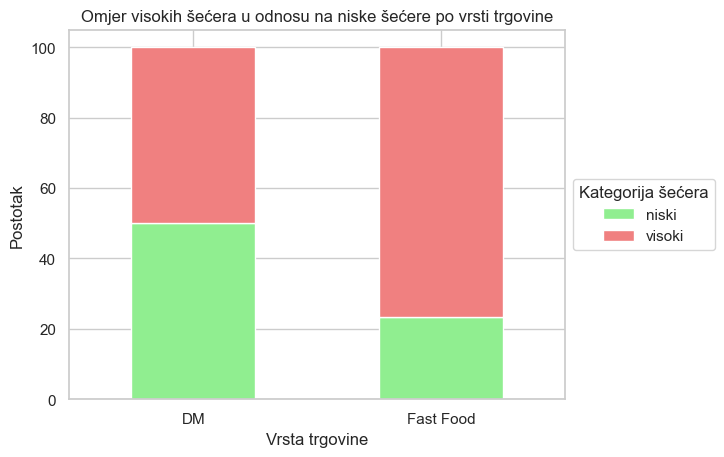

In [25]:
# Računanje postotne distribucije šećera
percentage_sugar = contingency_table_sugar.div(contingency_table_sugar.sum(axis=1), axis=0) * 100

# Stvaranje postotnog vertikalnog trakastog grafikona za šećer
ax_sugar = percentage_sugar.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])
plt.title('Omjer visokih šećera u odnosu na niske šećere po vrsti trgovine')
plt.xlabel('Vrsta trgovine')
plt.ylabel('Postotak')
plt.legend(title='Kategorija šećera', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Rotacija oznaka na x-osi 
plt.xticks(rotation=0)

plt.show()

<h2 style = "font-size:20px;">Vidimo kako kod Fast Food restorana ima više šećera, ali na ovolikom uzorku nema statistički značajno više kako bi mogli nešto zaključiti.

<h2 style = "font-size:34px;">PITANJE 3: Je li prosječna energetska vrijednost u DM-u statistički značajno različita od prosječne energetske vrijednosti u fast-food restoranima?</h2>

<h2 style = "font-size:20px;">Kao početak odgovora istaknuo bi jedan od prijašnjih odgovora - razlika u masti. Mast je makronutrijent koji uvelike pridonosi energetskoj vrijednosti hrane, te na temelju tog pitanja možemo ponuditi odgovor i na ovo, ali tada bi zanemarili ostale faktore koji ulaze u cjelovitu energetsku vrijednost.

Nulta hipoteza glasi: Ne postoji razlika u prosjecima energetskih vrijednosti hrane iz Fast Food restorana i DM-a.

Provest ćemo T-test za nezavisne uzorke.

In [26]:
from scipy.stats import ttest_ind

# Razdvajanje podataka na DM i fast-food
dm_data = data[data['Vrsta Trgovine'] == 'DM']['ENERGETSKA VRIJEDNOST / 100g (kcal)']
fast_food_data = data[data['Vrsta Trgovine'] == 'Fast Food']['ENERGETSKA VRIJEDNOST / 100g (kcal)']

# Izračun t-testa za nezavisne uzorke
t_statistic, p_value = ttest_ind(dm_data, fast_food_data, equal_var=False)

print("T-statistika:", t_statistic)
print("P-vrijednost:", p_value)

T-statistika: -6.892574492934408
P-vrijednost: 4.905568682593523e-06


<h2 style = "font-size:20px;">Kako je P-vrijednost jako mala (znatno ispod 0.05), možemo zaključiti kako postoji značajna razlika u prosječnoj energetskoj vrijednosti između dvije kategorije hrane. Također T-statistika = -6.89 pokazuje kako je energetska vrijednost u DM-u niža od Fast Food restorana.

Vizualizirajmo dobivene rezultate kako bi bolje prikazali jaz među energetskom vrijednosti. Napravit ćemo Box-plot koji prikazuje medijan, grupaciju podataka i outliere. 

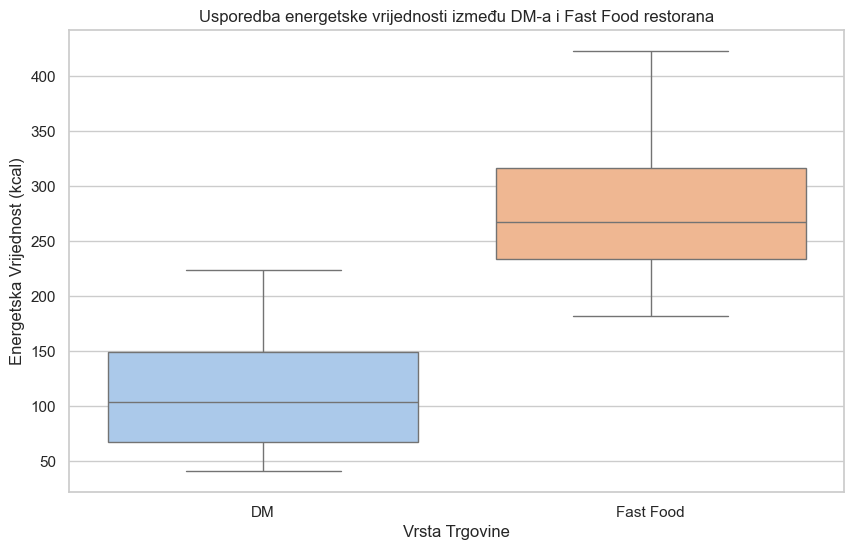

In [27]:
# Postavke stila za ljepši izgled grafa
sns.set(style="whitegrid")

# Stvaranje boxplota
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vrsta Trgovine', y='ENERGETSKA VRIJEDNOST / 100g (kcal)', data=data, hue='Vrsta Trgovine', palette='pastel', dodge=False)

# Postavljanje naslova i oznaka osi
plt.title('Usporedba energetske vrijednosti između DM-a i Fast Food restorana')
plt.xlabel('Vrsta Trgovine')
plt.ylabel('Energetska Vrijednost (kcal)')

# Prikaži grafikon
plt.show()

<h2 style = "font-size:20px;">Uočavamo kako je artikl s najvišom energetskom vrijednosti kod DM-a u istoj energetskoj razini kao i najnižih 25% artikala Fast Food restorana.

<h2 style = "font-size:34px;">PITANJE 4: Postoji li linearna veza između količine masti i energetske vrijednosti u hrani?</h2>

<h2 style = "font-size:20px;">Prethodni odgovor navodi nas na korelaciju između količine masti i energetske vrijednosti u hrani. Testirajmo tu hipotezu. 



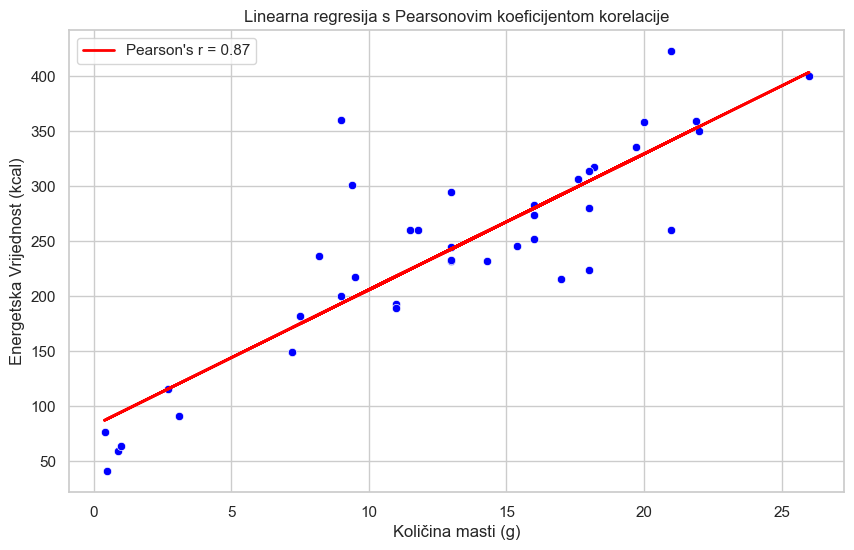

In [28]:
from sklearn.linear_model import LinearRegression

# Priprema podataka
X = data[['MASTI (g)']]  # Nezavisna varijabla (količina masti)
y = data['ENERGETSKA VRIJEDNOST / 100g (kcal)']  # Zavisna varijabla (energetska vrijednost)

# Inicijalizacija i treniranje modela
model = LinearRegression()
model.fit(X, y)

# Predviđanje vrijednosti
y_pred = model.predict(X)

# Računanje Pearsonovog koeficijenta korelacije
correlation = data['MASTI (g)'].corr(data['ENERGETSKA VRIJEDNOST / 100g (kcal)'])

# Scatter plot s regresijskom linijom
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MASTI (g)', y='ENERGETSKA VRIJEDNOST / 100g (kcal)', data=data, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Pearson\'s r = {correlation:.2f}')  # Dodavanje regresijske linije

# Postavljanje naslova i oznaka osi
plt.title('Linearna regresija s Pearsonovim koeficijentom korelacije')
plt.xlabel('Količina masti (g)')
plt.ylabel('Energetska Vrijednost (kcal)')

# Dodavanje legendi
plt.legend()

# Prikaži grafikon
plt.show()

<h2 style = "font-size:20px;">Pokrenuli smo funkciju linearne regresije koja pokazuje trend kretanja energetske vrijednosti u ovisnosti o količini masti. Na tim parametrima smo također pokrenuli Pearsonov test koeficijenta korelacije kako bi našli koliko su pojmovi međusobno povezani. 

Pearsonov koeficijent korelacije je 0 ako nema povezanosti, -1 kad je negativna povezanost, a 1 kad je pozitivna povezanost (rast jedne varijable je direktno povezan s rastom druge). Dobiveni koeficijent je 0.87 što je blizu 1, dakle statistički možemo zaključiti kako su količina masti i energetska vrijednost međusobno povezane vrijednosti. Znatiželje radi provest ćemo Pearsonov test na drugim varijablama iz tablice kako bi dočarali koje to varijable ne utječu na energetsku vrijednost.

In [29]:
from scipy.stats import pearsonr

# Popis varijabli za koje želimo izračunati Pearsonov koeficijent korelacije s energetskom vrijednošću
variables = ['ZASIĆENE MASNE KISELINE(g)', 'TRANS MASTI (g)', 'UGLJIKOHIDRATI (g)', 'ŠEĆER (g)', 'VLAKNA (g)', 'BJELANČEVINE (g)', 'SOL (g)']

# Konvertiranje relevantnih stupaca u numerički tip
numeric_columns = ['ENERGETSKA VRIJEDNOST / 100g (kcal)'] + variables
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Uklanjanje redaka s nepostojećim vrijednostima
data_cleaned = data.dropna(subset=['ENERGETSKA VRIJEDNOST / 100g (kcal)'] + variables)

# Izračunavanje Pearsonovog koeficijenta korelacije i p-vrijednosti za svaku varijablu
correlations = {}
p_values = {}

for variable in variables:
    correlation, p_value = pearsonr(data_cleaned['ENERGETSKA VRIJEDNOST / 100g (kcal)'], data_cleaned[variable])
    correlations[variable] = correlation
    p_values[variable] = p_value

# Prikaz rezultata u tablici s zaokruženim p-vrijednostima na 5 decimalnih mjesta
result_table = pd.DataFrame({'Varijabla': variables, 'Pearsonov koeficijent korelacije': [round(correlations[var], 2) for var in variables], 'P-vrijednost': [round(p_values[var], 5) for var in variables]})
result_table


,Varijabla,Pearsonov koeficijent korelacije,P-vrijednost
0,ZASIĆENE MASNE KISELINE(g),0.61,0.00003
1,TRANS MASTI (g),0.46,0.00305
2,UGLJIKOHIDRATI (g),0.65,0.00001
3,ŠEĆER (g),0.39,0.01223
4,VLAKNA (g),-0.12,0.46873
5,BJELANČEVINE (g),0.75,0.00000
6,SOL (g),-0.04,0.81995


<h2 style = "font-size:20px;">Podsjećam, P-vrijednost veća of 0.05 pokazuje da količina podataka na kojima je test zasnovan nije dovoljno velika kako bi se statistički došlo do zaključka, stoga kategoriju "Vlakna" i "Sol" ne možemo uzeti u obzir.

<h2 style = "font-size:34px;">PITANJE 5: Postoji li statistički značajna razlika u udjelu trans masti između različitih vrsta fast-food restorana (npr. McDonald's, KFC, Burger King)?</h2>

<h2 style = "font-size:20px;">Trans masti su česta tema zdravstvenih blogova zadnjih godina. Dokazano je kako je njihova konzumacija povezana sa začepljivanjem krvnih žila kroz proces povećavanja LDL kolesterola ("loš kolesterol", začepljuje žile) i istovremenog smanjivanja količine HDL kolesterola ("dobar kolesterol", čisti žile). 

Nas zanima postoji li razlika u količini trans masti po 100g proizvoda iz odabranih Fast Food restorana.
DM nećemo uzeti u obzir jer je očito da iz zadanih podataka niti jedan proizvod nema prisutnih trans masti.

Provest ćemo ANOVA test. ANOVA test je statistička tehnika koja se koristi za testiranje razlika srednjih vrijednosti unutar grupe od tri ili više člana. Uspoređuju se varijance unutar grupe te se utvrđuje jesu li razlike veće od onoga što bismo očekivali zbog slučajnosti. 

Nulta hipoteza (H0): Srednje vrijednosti trans masti su jednake za sve vrste Fast Food restorana.


In [30]:
from scipy.stats import f_oneway

# Filtriranje podataka za fast-food restorane
fast_food_data = data[data['Vrsta Trgovine'] == 'Fast Food']

# ANOVA test 
anova_result = f_oneway(
    fast_food_data[fast_food_data['IME TRGOVINE'] == 'McDonald\'s']['TRANS MASTI (g)'],
    fast_food_data[fast_food_data['IME TRGOVINE'] == 'KFC']['TRANS MASTI (g)'],
    fast_food_data[fast_food_data['IME TRGOVINE'] == 'Burger King']['TRANS MASTI (g)']
)

# Ispis rezultata
print("F-statistika:", anova_result.statistic)
print("P-vrijednost:", anova_result.pvalue)

F-statistika: 4.348314606741573
P-vrijednost: 0.02306447139722571


<h2 style = "font-size:20px;">Kako je P-vrijednost = 0.023 odbacujemo H0 i zaključujemo da se jedan član grupe ističe.

Da bi otkrili koji je to provest ćemo Tukey-ev test.

In [31]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filtriranje podataka za fast-food restorane
fast_food_data = data[data['IME TRGOVINE'].isin(['McDonald\'s', 'KFC', 'Burger King'])]

# Izvođenje Tukey-jevog testa za udio trans masti između različitih vrsta fast-food restorana
tukey_result = pairwise_tukeyhsd(fast_food_data['TRANS MASTI (g)'], fast_food_data['IME TRGOVINE'])

# Ispis rezultata
print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
Burger King        KFC    -0.27 0.0187 -0.4995 -0.0405   True
Burger King McDonald's    -0.17 0.1771 -0.3995  0.0595  False
        KFC McDonald's      0.1 0.5342 -0.1295  0.3295  False
-------------------------------------------------------------


<h2 style = "font-size:20px;">Tukey-ev test uparuje sve moguće parove te ih zasebno testira. Dobiveni rezultati pokazuju kako se Burger King i KFC najviše razlikuju. 
Interpretirajući rezultate zaključujemo kako najmanju količinu trans masti po prosjeku ima KFC, McDonalds je u sredini i Burger King ima najviše.

Prikažimo podatke vizualno.

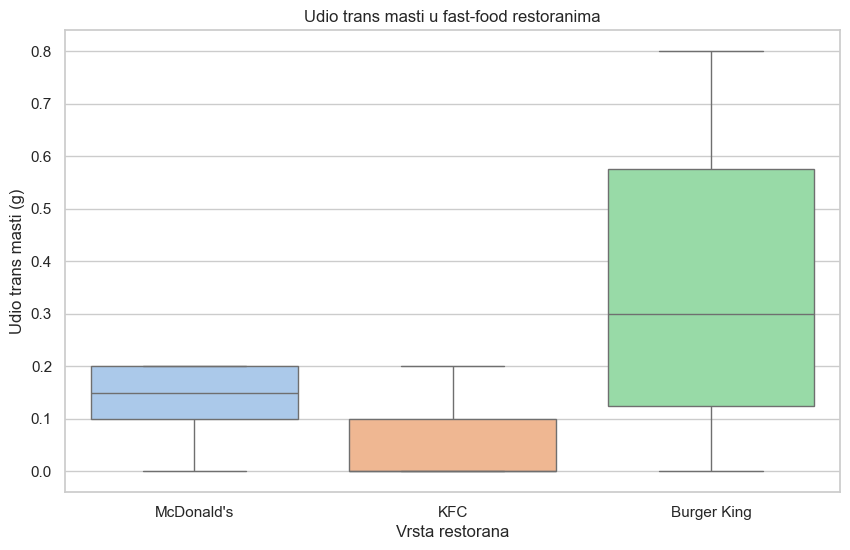

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# Filtriranje podataka za fast-food restorane
fast_food_data = data[data['IME TRGOVINE'].isin(['McDonald\'s', 'KFC', 'Burger King'])]

# Postavljanje stila grafa
sns.set(style="whitegrid")

# Stvaranje kutija i brkova dijagrama
plt.figure(figsize=(10, 6))
sns.boxplot(x='IME TRGOVINE', y='TRANS MASTI (g)', data=fast_food_data, palette='pastel', showfliers=False)

# Postavljanje naslova i oznaka
plt.title('Udio trans masti u fast-food restoranima')
plt.xlabel('Vrsta restorana')
plt.ylabel('Udio trans masti (g)')

# Prikaz grafa
plt.show()

<h2 style = "font-size:34px;">PITANJE 6: Može li se na temelju nutritivnih vrijednosti proizvoda iz različitih restorana modelirati sustav koji pogađa iz kojeg restorana proizvod dolazi?</h2>

<h2 style = "font-size:20px;">Najzanimljivije pitanje ovog projekta dolazi na kraju - izrada modela za predviđanje. Za početak ćemo obraditi skup podataka tako da je ostalo samo najpotrebnije za logističku regresiju. Ukloniti ćemo stupce poput "IME PROIZVODA", "IME TRGOVINE"... odvojiti ćemo podatkovni skup na način da su od svakog restorana po 9 artikla na kojim se trenira model i zadnji artikl na kojem će se testirati. 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('PROJEKT_R_DATA_CSV.csv')

# Uklanjamo nepotrebne stupce
columns_to_drop = ['IME PROIZVODA', 'CIJENA (€)']
data_cleaned = data.drop(columns=columns_to_drop)

# Dijelimo podatke u podatke x i traženu varijablu y (Vrsta Trgovine) 
X = data_cleaned.drop(columns=['IME TRGOVINE'])
y = data_cleaned['IME TRGOVINE']

# Dijelimo podatke u podskup za treniranje i podskup za testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Popunjavamo nedostajeće vrijednosti sa srednjom vrijednosti
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Provodimo logističku regresiju
model = LogisticRegression(random_state=42)

# Treniramo model
model.fit(X_train_imputed, y_train)

# Stvaramo predikcije / pogađamo 
y_pred = model.predict(X_test_imputed)

# Ocijenjujemo kako je nasš model uspješan
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Rezultati
print(f"Preciznost: {accuracy}")
print(f"\nIzvještaj:\n{classification_rep}")

# Stvaranje DataFrame-a s stvarnim klasama i predikcijama
predictions_df = pd.DataFrame({'Stvarna klasa': y_test, 'Predikcija': y_pred})

# Ispis tablice
print(predictions_df)

Preciznost: 0.875

Izvještaj:
              precision    recall  f1-score   support

 Burger King       0.50      1.00      0.67         1
          DM       1.00      1.00      1.00         1
         KFC       1.00      1.00      1.00         2
  McDonald's       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.88      0.94      0.88         8
weighted avg       0.94      0.88      0.89         8

   Stvarna klasa   Predikcija
19    McDonald's   McDonald's
16    McDonald's  Burger King
15    McDonald's   McDonald's
26           KFC          KFC
4             DM           DM
12    McDonald's   McDonald's
37   Burger King  Burger King
27           KFC          KFC


<h2 style = "font-size:20px;">Naš model je točno pogodio ime restorana u 87.5% slučajeva na temelju samo 10 artikla iz 4 restorana. 

Sporni dio je između Burger King-a i McDonalds-a jer kako smo vidjeli u prethodnim testovima to su dva relativno bliska restorana.